# Despike

This notebook provide an example of how to manipulate the [`despike`](https://pypi.org/project/despike/) package to remove spikes in 2D images.

## Description

The spikes in 2D-images correspond to high-energy pixels generated by cosmic rays, sensor noise or dead pixels. They use to have values very different from the rest of their neighboor.
To find them, we use a moving box (5×5 pixels by default) on the image and we compare the mean/median of this sub-image to the central pixel. If the value is `n` (3 by default) times larger than the observed standard deviation we use the median value a the surrounding pixels (8 pixels by default) to replace the spike.

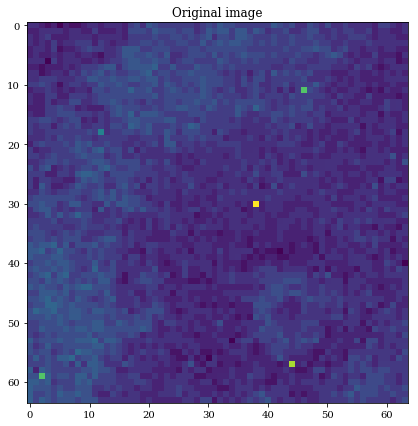

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import despike

# Load some data
img = np.loadtxt('tests/data/img.dat')

plt.figure(figsize=(7,7))
plt.imshow(img)
plt.title('Original image')
plt.show()

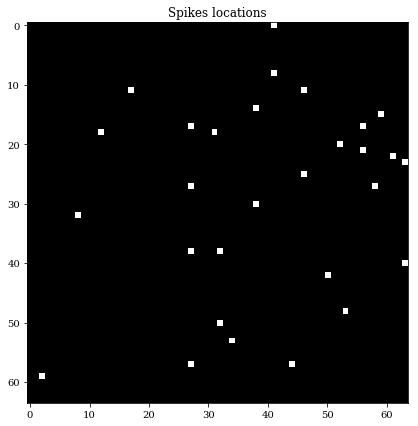

In [2]:
# Search the location of spikes in the image
spikes = despike.spikes(img)

plt.figure(figsize=(7,7))
plt.imshow(spikes, cmap=plt.get_cmap('gray'))
plt.title('Spikes locations')
plt.show()

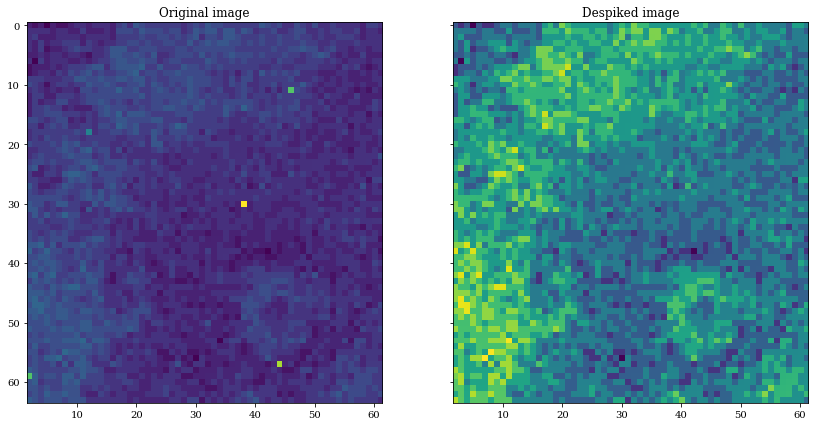

In [3]:
# Clean the image from spikes
clean_img = despike.clean(img)

f, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(14,7))
ax0.imshow(img)
ax1.imshow(clean_img)
ax0.set_title('Original image')
ax1.set_title('Despiked image')
plt.show()

## Other filtering

This module also provide mean and median filters on the image to remove globally the oulayer pixels:

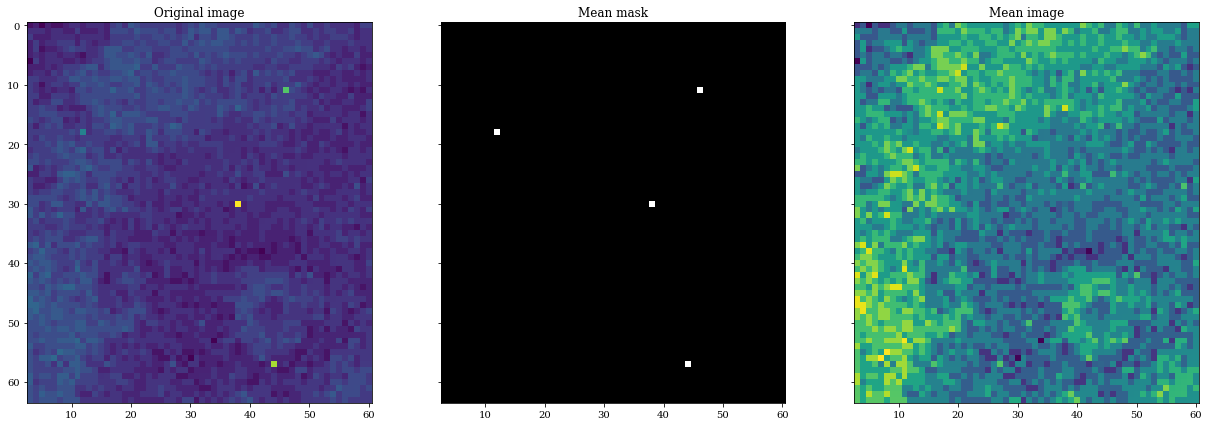

In [4]:
# Mean filtering
from despike.mean import mask, mean

mean_mask = mask(img)
mean_img = mean(img)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(21,7))
ax0.imshow(img)
ax1.imshow(mean_mask, cmap=plt.get_cmap('gray'))
ax2.imshow(mean_img)
ax0.set_title('Original image')
ax1.set_title('Mean mask')
ax2.set_title('Mean image')
plt.show()

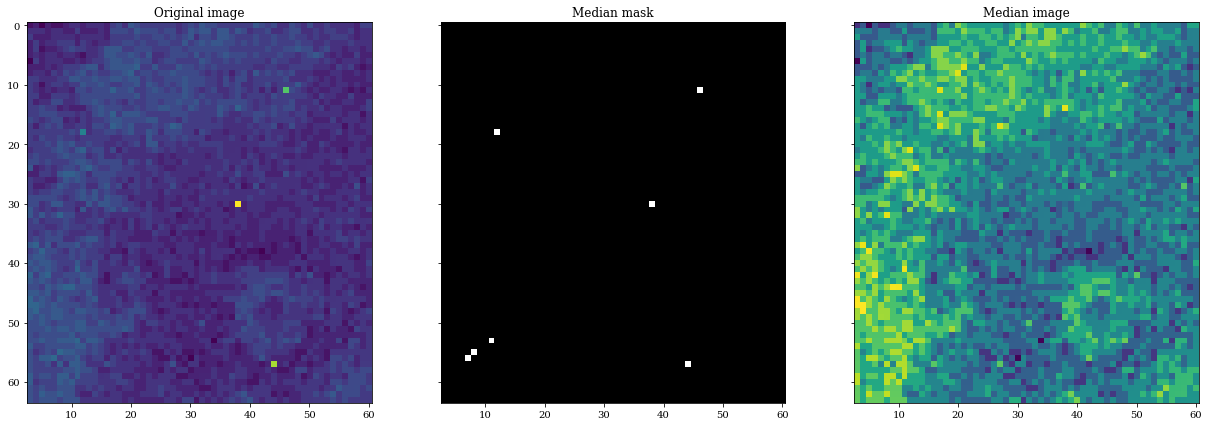

In [5]:
# Median filtering
from despike.median import mask, median

median_mask = mask(img)
median_img = median(img)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(21,7))
ax0.imshow(img)
ax1.imshow(median_mask, cmap=plt.get_cmap('gray'))
ax2.imshow(median_img)
ax0.set_title('Original image')
ax1.set_title('Median mask')
ax2.set_title('Median image')
plt.show()